In [8]:
%matplotlib inline

import numpy as np
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import StringIO
from sklearn.externals.six import StringIO
import pydot

# Importing the data from csv files
train_data= pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#Making the DataFrames
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)


In [9]:
## Cleaning the train Data

#Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train['Sex'][train['Sex']== 'female'] = 1
#Impute the Embarked variable
train["Embarked"] = train['Embarked'].fillna('S')

#Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0.0
train["Embarked"][train["Embarked"] == "C"] = 1.0
train["Embarked"][train["Embarked"] == "Q"] = 2.0

# Cleaning the train data to remove the NaN in the age column
train = train[train['Age'].notnull()]

/home/gnavarro/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gnavarro/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gnavarro/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gnavarro/Enthought/Canopy_64bit/User/lib/python2.7/site-package

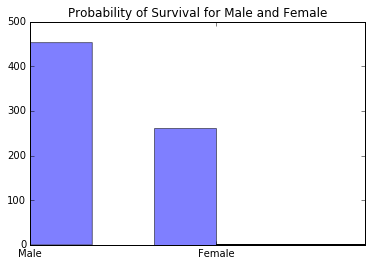

In [12]:
## Visualizing the features and their importance
## Sex
# Histogram, counts how many people there was
plt.hist(train.Sex,3,facecolor='blue',alpha=0.5)
plt.xticks([0,1],['Men','Women'])
plt.title('Total amount of Men and Women')
## Group by survived
grouped = train.groupby(train['Survived'])
# Get the survivors and plot
survivors = grouped.get_group(1)
dead = grouped.get_group(0)

total_men = train[train.Sex == 0].Survived.count()
total_female = train[train.Sex == 1].Survived.count()

female_survivors_prob = float(survivors.Sex.sum())/float(total_female)
male_survivors_prob = float(survivors[survivors.Sex == 0].Survived.count())/float(total_men)

plt.bar([0,1],[male_survivors_prob,female_survivors_prob])
plt.xticks([0,1],['Male','Female'])
plt.title('Probability of Survival for Male and Female')


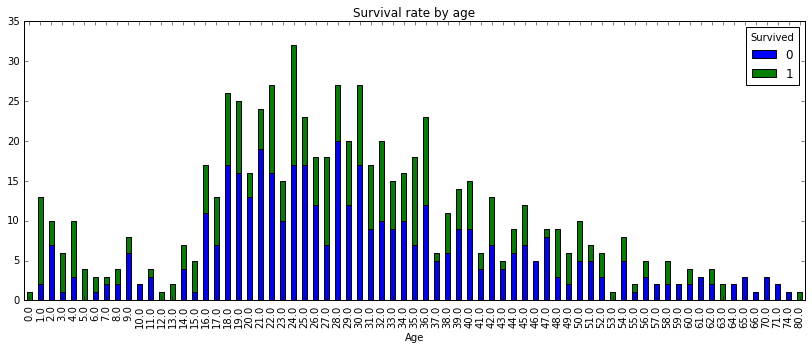

In [17]:
## Study of the ages?

# Round the ages and drop the useless columns
train_age = train.drop(['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],1)

train_age.Age = train_age.Age.round()
train_crosstab = pd.crosstab(train_age.Age,train_age.Survived)
# Plotting
train_crosstab.plot(kind='bar',stacked=True,title = 'Survival rate by age',figsize=(14,5))

[ 0.14401212  0.30051221  0.25235238  0.30312328]
0.984593837535


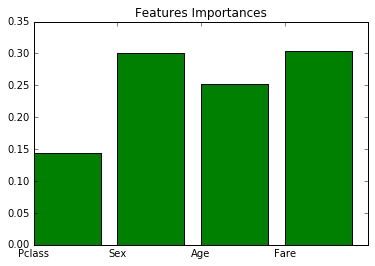

In [32]:
## Making of the Decision Tree

# Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

# Construct the tree using the features_one to make the classification and using the target column as the goal
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one,target)

# Look at the importance and score of the included features
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one,target))
plt.bar([0,1,2,3],my_tree_one.feature_importances_,color='green')
plt.xticks([0,1,2,3],["Pclass", "Sex", "Age", "Fare"])
plt.title('Features Importances')

In [33]:
# Visualizing the Tree
with open("titanic_train_data.dot",'w') as f:
	f=tree.export_graphviz(my_tree_one,feature_names=["Pclass", "Sex", "Age", "Fare"], out_file=f)

In [34]:
##### MAKING THE PREDICTION ON THE TEST DATA USING THE CONSTRUCTED TREE

# Cleaning the Null values in the Fare column, and replacing them by the median

test['Fare'][test['Fare'].isnull()] = test.Fare.median()

#Convert the male and female groups to integer form
test["Sex"][test["Sex"] == "male"] = 0
test['Sex'][test['Sex']== 'female'] = 1
#Impute the Embarked variable
test["Embarked"] = test['Embarked'].fillna('S')

#Convert the Embarked classes to integer form
test["Embarked"][test["Embarked"] == "S"] = 0.0
test["Embarked"][test["Embarked"] == "C"] = 1.0
test["Embarked"][test["Embarked"] == "Q"] = 2.0

# Cleaning the test data to remove the NaN in the age column
test = test[test['Age'].notnull()]
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass","Sex","Age","Fare"]].values

/home/gnavarro/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gnavarro/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gnavarro/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gnavarro/Enthought/Canopy_64bit/User/lib/python2.7/site-packages

In [35]:
# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)
print(my_prediction)

# Making a new DataFrame to store the prediction results
 
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])

[0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f583fbca310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f583f5925d0>]], dtype=object)

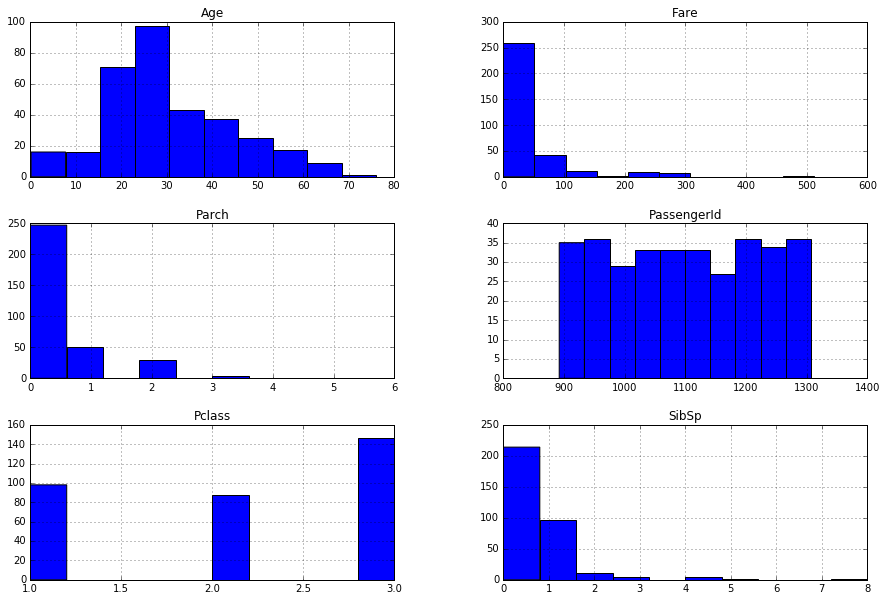

In [39]:
test.hist(figsize=(15,10))